<a href="https://colab.research.google.com/github/arnonLuts/ML/blob/main/Ex4_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

Your Name:  
<font color='red'>
Arnon Lutsky, 213561640   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [ ]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

<ipython-input-17-5d2f93b9a0ca>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


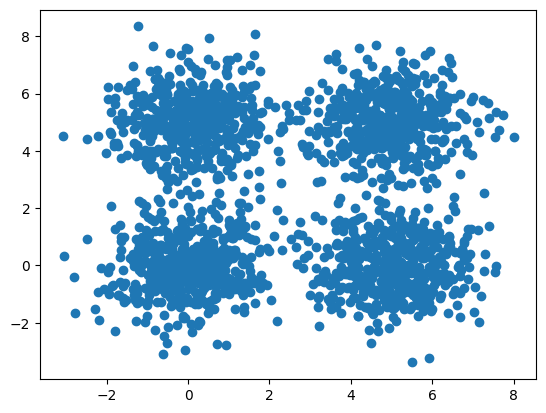

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [ ]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        self.X_fit_ = X
        n,m = X.shape
        prototypes = np.random.choice(n, n_clusters, replace='False')
        self.centroids = X[prototypes]
        for i in range (self.max_iter):
          self.labels_ = self._get_labels(X)
          self.labels_history.append(self.labels_)
          new_centroids = self._get_centroids(X, self.labels_)
          self.centroids_history.append(new_centroids)
          self.costs.append(self._calculate_cost(X))
          if np.all(new_centroids == self.centroids):
              break
          self.centroids = new_centroids

        self.centroids = new_centroids
        pass

    def predict(self, X):
        return self._get_labels(X)

    def _get_distances(self, X):
      d  = np.zeros((X.shape[0], self.n_clusters))
      for i in range (self.n_clusters):
          d[:, i] = np.sum((X - self.centroids[i])**2, axis = 1)
      return d

    def _get_labels(self, X):
        return np.argmin(self._get_distances(X), axis = 1)

    def _get_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[labels == i], axis=0)
        return centroids

    def _calculate_cost(self, X):
      cost = 0
      for i in range (n_clusters):
        clust_samp_num = X[i == self.labels_]
        if len(clust_samp_num) > 0:
          cost += np.sum((clust_samp_num - self.centroids[i])**2)
      return cost




Run the algorithm on the 2D dataset

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

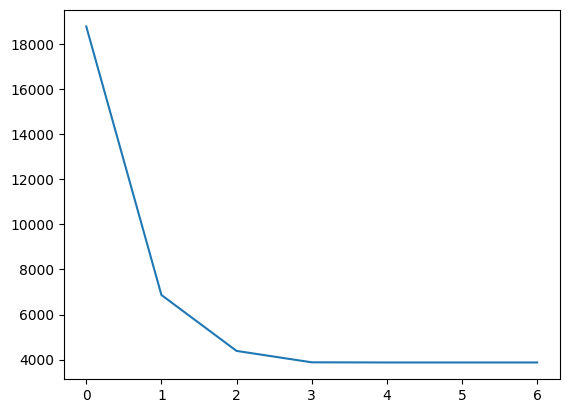

In [ ]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters:16196.022111582266 <br>
3 clusters: 10191.70516617384 <br>
4 clusters: 3970.298789919552 <br>
6 clusters: 3256.012549202524 <br>
8 clusters: 2827.0535480839944 <br>
10 clusters: 2359.9138325783015 <br>
20 clusters: 1156.0345974254344 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

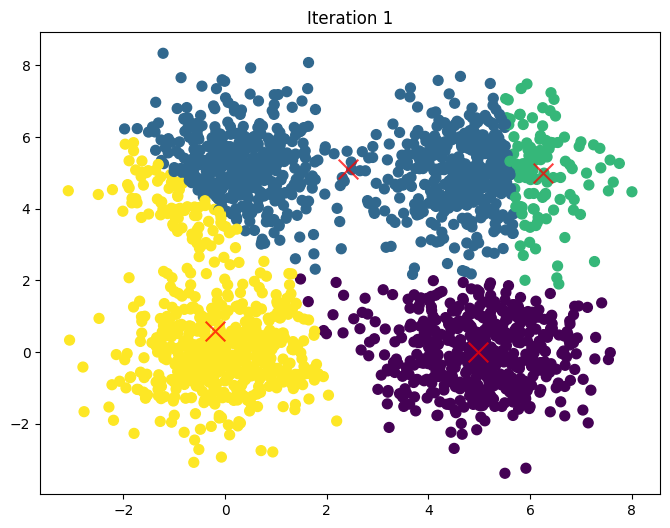

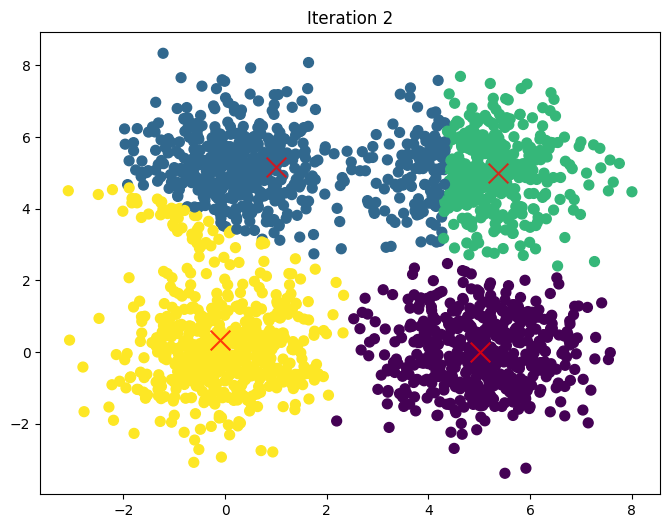

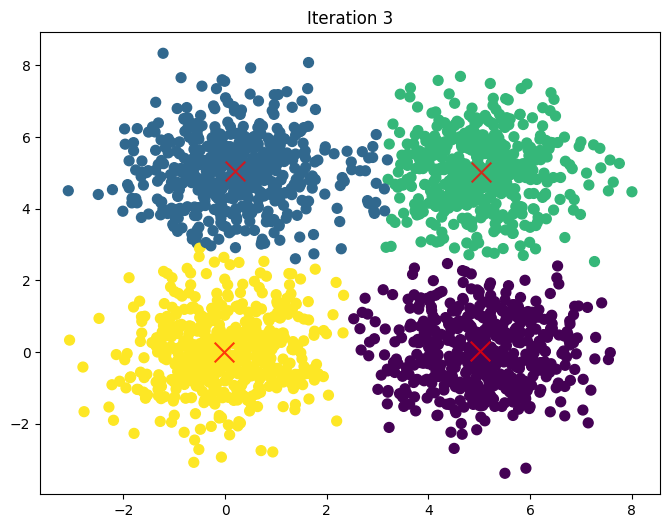

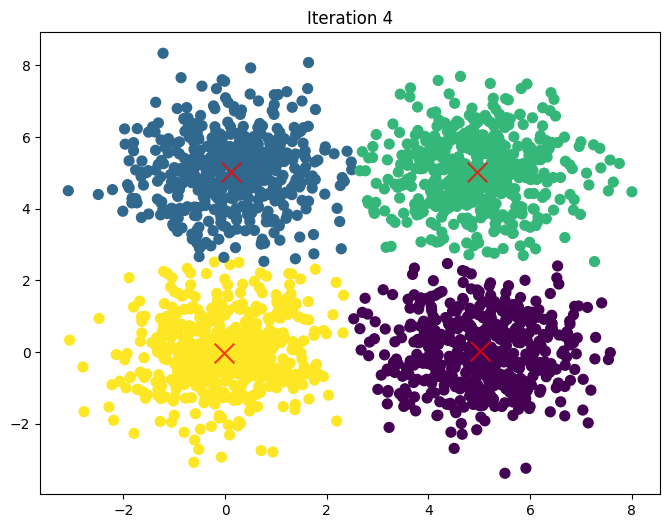

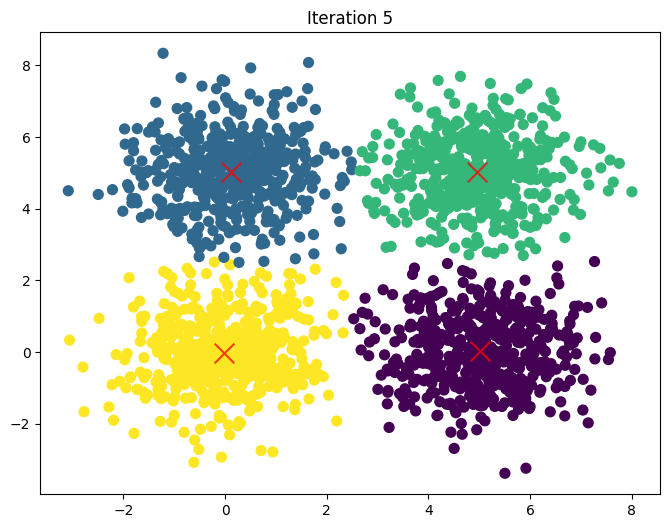

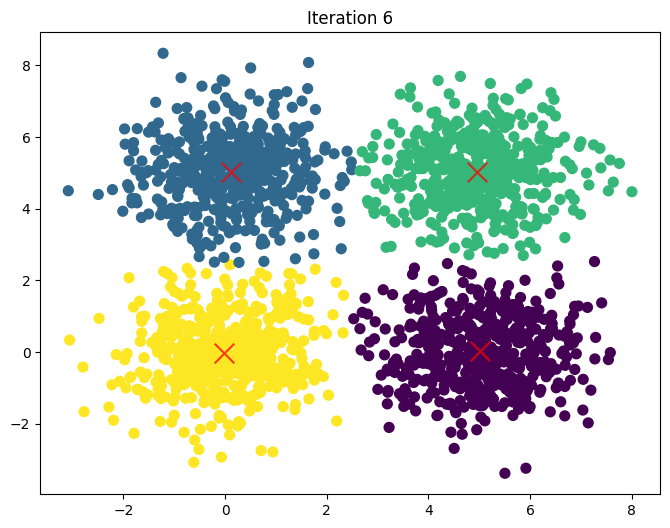

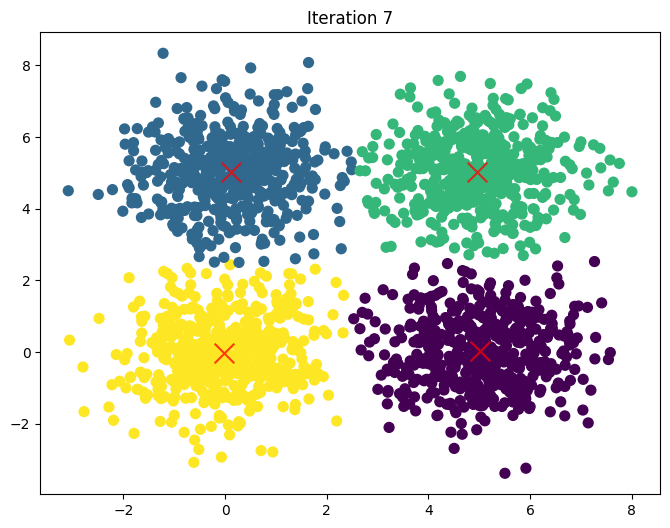

In [ ]:
for i in range(len(kmeans.centroids_history)):
  plt.figure(figsize=(8, 6))
  centroids = kmeans.centroids_history[i]
  labels = kmeans.labels_history[i]
  plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='x')
  plt.title(f'Iteration {i + 1}')
  plt.show()


## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [ ]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
      X_centered = X - (np.mean(X,axis = 0))
      COVX = np.cov(X_centered, rowvar=False)
      eigenvalues, eigenvectors = np.linalg.eigh(COVX)
      eigenvalues_sorted = np.argsort(eigenvalues)[::-1]
      self.V = eigenvectors[:, eigenvalues_sorted]
    def transform(self, X, n_dimentions):
        X_reduced = np.dot(X, self.V[:, : n_dimentions])
        return X_reduced



Run the algorithm on MNIST dataset.

In [ ]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

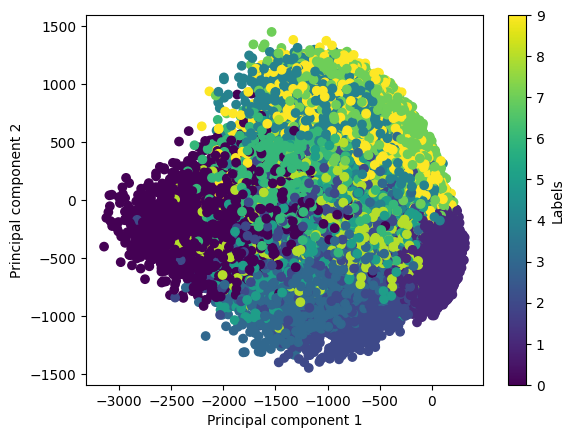

In [ ]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

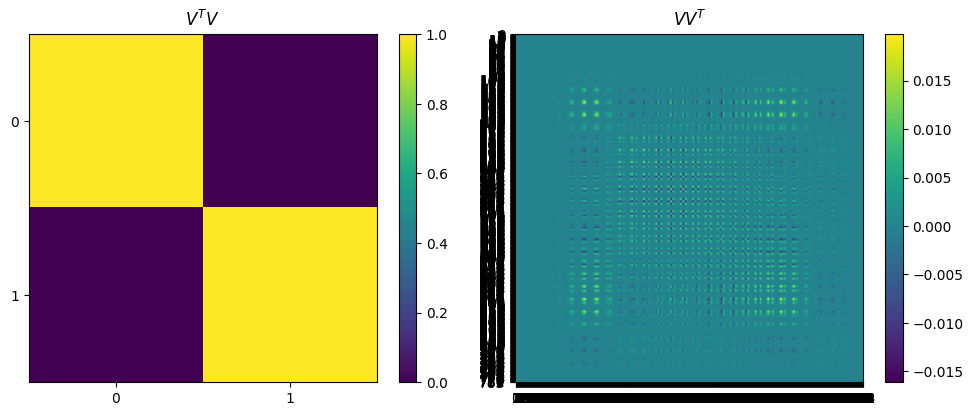

In [ ]:
V = pca.V[:, : 2]
VTV = np.dot(V.T, V)
VVT = np.dot(V, V.T)
d = pca.V.shape[0]
r = 2

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(VTV, cmap='viridis')
plt.title('$V^T V$')
plt.colorbar()
plt.xticks(np.arange(r))
plt.yticks(np.arange(r))

plt.subplot(1, 2, 2)
plt.imshow(VVT, cmap='viridis')
plt.title('$V V^T$')
plt.colorbar()
plt.xticks(np.arange(d))
plt.yticks(np.arange(d))

plt.tight_layout()
plt.show()

Your Explanation:
The biggest difference is the dimention of both matricies. VTV ∈ R rXr is equal to 𝚰 as we showed in class (and as it is composed of eigenvalues creating a base).  VVT is of dimantion dXd and d>=r. That's why we see that VVT has more cells. Because d>=r the eigenvalues may not complete a base (and in this case d>r => VVT != 𝚰)

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimentions):
    encoded = np.dot(pca.V[:, : n_dimentions].T,x)
    x_reconstructed = np.dot(pca.V[:, : n_dimentions], encoded)
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


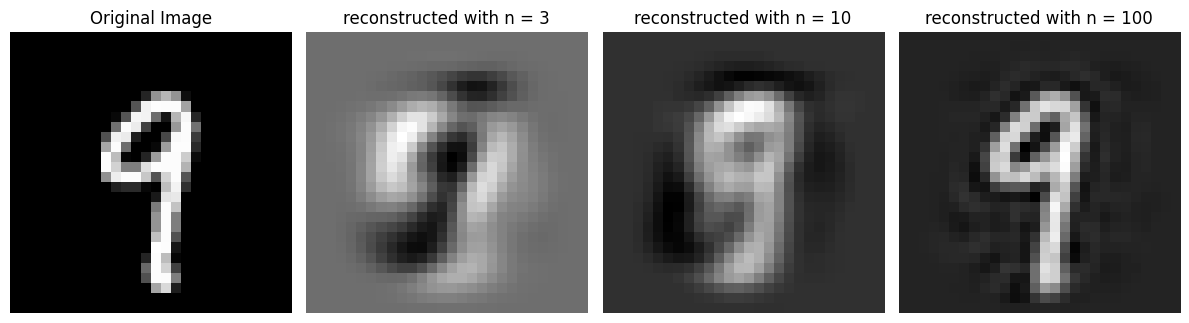

In [ ]:
sample_image = X[np.random.choice(X.shape[0])]
dimensions = [3, 10, 100]
reconstructed_images = [pca_reconstruction(sample_image, n) for n in dimensions]

# Plotting the original and reconstructed images
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, n in enumerate(dimensions):
    plt.subplot(1, 4, i + 2)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'reconstructed with n = {n}')
    plt.axis('off')

plt.tight_layout()
plt.show()